Importing useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Start Here
Mount the drive here!
Then load in the data and remove columns that are completely empty.

Importing the Sales data collected from Dolthub into a dataframe. It's a large dataset, so low_memory=False is required. Colab has the memory.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Course/Capstone Work/PinellasSalesDATA.csv',low_memory=False)

Quick inspection of the dataframe. There is a lot of missing data. I was hoping for more information such as year built, number of beds/baths, the type of property, etc.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595686 entries, 0 to 1595685
Data columns (total 43 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   state                     1595686 non-null  object 
 1   property_zip5             1002398 non-null  float64
 2   property_street_address   1595686 non-null  object 
 3   property_city             1595686 non-null  object 
 4   property_county           1595686 non-null  object 
 5   property_id               1595686 non-null  object 
 6   sale_datetime             1595686 non-null  object 
 7   property_type             1 non-null        object 
 8   sale_price                1595686 non-null  int64  
 9   seller_1_name             1045447 non-null  object 
 10  buyer_1_name              1047565 non-null  object 
 11  building_num_units        0 non-null        float64
 12  building_year_built       0 non-null        float64
 13  source_url                1

In [4]:
df.dropna(axis=1,how='all',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595686 entries, 0 to 1595685
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   state                    1595686 non-null  object 
 1   property_zip5            1002398 non-null  float64
 2   property_street_address  1595686 non-null  object 
 3   property_city            1595686 non-null  object 
 4   property_county          1595686 non-null  object 
 5   property_id              1595686 non-null  object 
 6   sale_datetime            1595686 non-null  object 
 7   property_type            1 non-null        object 
 8   sale_price               1595686 non-null  int64  
 9   seller_1_name            1045447 non-null  object 
 10  buyer_1_name             1047565 non-null  object 
 11  source_url               1595686 non-null  object 
 12  book                     1582653 non-null  float64
 13  page                     1582657 non-null 

The only useful values that are remaining are the address, sale time, price, some with building area in sqft, land area in sqft, and land assessed value.

Land assessed value is what the county values the land at. The county has limits to how much it can raise that assessment overtime for property taxes.

From the [Dolthub database](https://www.dolthub.com/repositories/dolthub/us-housing-prices-v2), book and page refer to records in a book. Going to check that out with a sample of those columns.

In [5]:
df[['source_url','book','page']].head(10)

,source_url,book,page
0,https://www.pcpao.org/datadownload.php,5656.0,1868.0
1,https://www.pcpao.org/datadownload.php,5747.0,1288.0
2,https://www.pcpao.org/datadownload.php,5743.0,1074.0
3,https://www.pcpao.org/datadownload.php,5736.0,720.0
4,https://www.pcpao.org/datadownload.php,5732.0,1187.0
5,https://www.pcpao.org/datadownload.php,6063.0,529.0
6,https://www.pcpao.org/datadownload.php,6187.0,1119.0
7,https://www.pcpao.org/datadownload.php,6221.0,1274.0
8,https://www.pcpao.org/datadownload.php,6508.0,1154.0
9,https://www.pcpao.org/datadownload.php,6683.0,1961.0


The book, source, and page information seem useless to me.

#Number of Property ids
I want to check out how many 'property_id's there are. I could get a sense of how many times each property has been sold, if any.

In [6]:
sales_per_propertydf = df.groupby('property_id').size().sort_values(ascending=False)
sales_per_propertydf.head()

,0
property_id,
163117301680020100,6
153031818050003140,6
153031818050001190,6
163113638100000330,6
152811970040000060,6


In [7]:
sales_per_propertydf.describe()

,0
count,514662.000000
mean,3.100454
std,1.741077
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,6.000000


514,662 unique property_ids. Every property_id has been sold once. The maximum is 6 times. The mean number of times a property has been sold is 3.1. The median is 3 times sold.

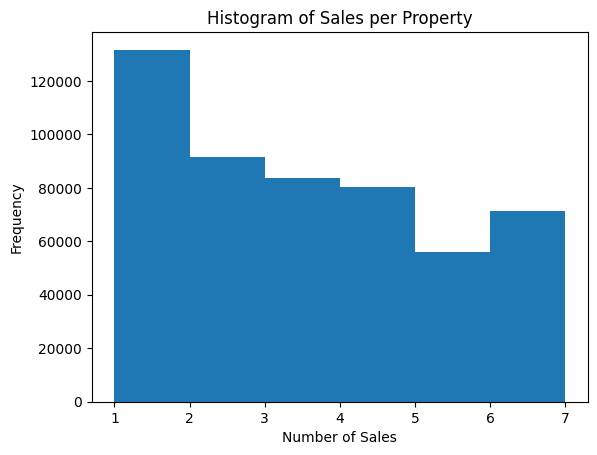

In [8]:
# prompt: a histogram of sales_per_propertydf

plt.hist(sales_per_propertydf, bins=[1,2,3,4,5,6,7])
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales per Property')
plt.show()


#Property Sales Dates
I want to group property sales by years. Get a sense of how many sales there were each year and what the prices were like.

In [9]:
df['sale_time'] = pd.to_datetime(df['sale_datetime'])
print(df['sale_time'].describe())
print(df['sale_time'].head())
df['year'] = df['sale_time'].dt.year

count                          1595686
mean     2000-05-16 13:20:32.318425984
min                1899-01-01 00:00:00
25%                1988-03-17 00:00:00
50%                2001-02-19 00:00:00
75%                2014-03-27 00:00:00
max                2022-06-15 00:00:00
Name: sale_time, dtype: object
0   1983-12-31 00:00:00
1   1984-04-30 00:00:00
2   1984-04-30 00:01:00
3   1984-04-30 00:02:00
4   1984-04-30 00:03:00
Name: sale_time, dtype: datetime64[ns]


In [10]:
df.columns

Index(['state', 'property_zip5', 'property_street_address', 'property_city',
       'property_county', 'property_id', 'sale_datetime', 'property_type',
       'sale_price', 'seller_1_name', 'buyer_1_name', 'source_url', 'book',
       'page', 'building_area_sqft', 'land_area_sqft', 'land_assessed_value',
       'sale_time', 'year'],
      dtype='object')

In [11]:
print(df['year'].describe())
yearly_salesdf = df.groupby('year').size()

count    1.595686e+06
mean     1.999793e+03
std      1.494500e+01
min      1.899000e+03
25%      1.988000e+03
50%      2.001000e+03
75%      2.014000e+03
max      2.022000e+03
Name: year, dtype: float64


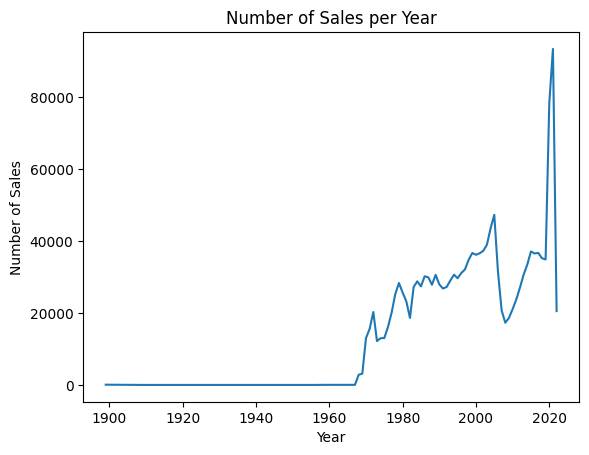

In [12]:
plt.plot(yearly_salesdf)
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Year')
plt.show()

Most of the sales seem to start after 1970. Going to take a look in a cumulative plot to see when.

In [13]:
yearly_salesdf.head()
yearly_salesdf.rename('Number of Sales',inplace=True)
yearly_salesdf.head()

,Number of Sales
year,
1899,65
1909,1
1912,1
1913,1
1914,1


In [14]:
total_sales = []
for i in range(len(yearly_salesdf)):
  total_sales.append(sum(yearly_salesdf.values[:i+1]))
total_sales

[65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 90,
 106,
 124,
 148,
 169,
 190,
 210,
 234,
 250,
 277,
 301,
 3121,
 6247,
 19269,
 34851,
 55135,
 67327,
 80315,
 93351,
 109456,
 129570,
 154871,
 183208,
 208876,
 232128,
 250760,
 277995,
 306797,
 334196,
 364401,
 394317,
 422174,
 452784,
 480742,
 507548,
 534779,
 563796,
 594444,
 624106,
 655215,
 687318,
 722104,
 758783,
 794966,
 831555,
 868858,
 907857,
 951439,
 998730,
 1030264,
 1050994,
 1068287,
 1086920,
 1107990,
 1131752,
 1158801,
 1189442,
 1222904,
 1260009,
 1296557,
 1333267,
 1368491,
 1403389,
 1481745,
 1575164,
 1595686]

In [15]:
year_total_sale_dict={}
for i in range(len(yearly_salesdf)):
  year_total_sale_dict[yearly_salesdf.index[i]] = total_sales[i]
year_total_sale_dict


{1899: 65,
 1909: 66,
 1912: 67,
 1913: 68,
 1914: 69,
 1918: 71,
 1923: 72,
 1947: 73,
 1951: 74,
 1952: 75,
 1953: 76,
 1955: 78,
 1956: 79,
 1957: 90,
 1958: 106,
 1959: 124,
 1960: 148,
 1961: 169,
 1962: 190,
 1963: 210,
 1964: 234,
 1965: 250,
 1966: 277,
 1967: 301,
 1968: 3121,
 1969: 6247,
 1970: 19269,
 1971: 34851,
 1972: 55135,
 1973: 67327,
 1974: 80315,
 1975: 93351,
 1976: 109456,
 1977: 129570,
 1978: 154871,
 1979: 183208,
 1980: 208876,
 1981: 232128,
 1982: 250760,
 1983: 277995,
 1984: 306797,
 1985: 334196,
 1986: 364401,
 1987: 394317,
 1988: 422174,
 1989: 452784,
 1990: 480742,
 1991: 507548,
 1992: 534779,
 1993: 563796,
 1994: 594444,
 1995: 624106,
 1996: 655215,
 1997: 687318,
 1998: 722104,
 1999: 758783,
 2000: 794966,
 2001: 831555,
 2002: 868858,
 2003: 907857,
 2004: 951439,
 2005: 998730,
 2006: 1030264,
 2007: 1050994,
 2008: 1068287,
 2009: 1086920,
 2010: 1107990,
 2011: 1131752,
 2012: 1158801,
 2013: 1189442,
 2014: 1222904,
 2015: 1260009,
 2016:

In [16]:
pd.Series(year_total_sale_dict)

,0
1899,65
1909,66
1912,67
1913,68
1914,69
...,...
2018,1368491
2019,1403389
2020,1481745
2021,1575164


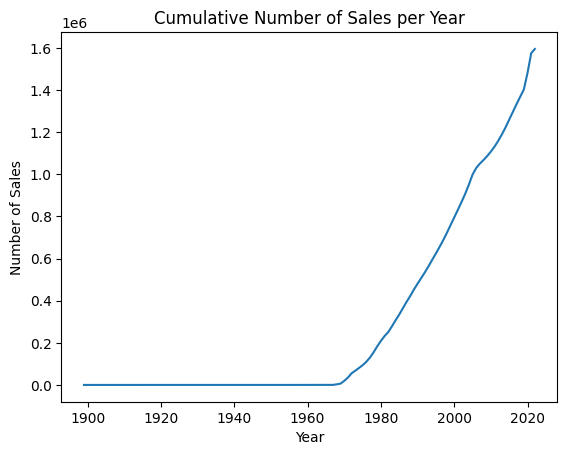

In [17]:
plt.plot(pd.Series(year_total_sale_dict))
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title('Cumulative Number of Sales per Year')
plt.show()

I think just working with the data from 1970 onwards will be okay in predicting prices(maybe)

# Making a dot plot of sales prices over time.
This should be easy considering the dataframe now has year data.

In [20]:
df['sale_price'].describe()

,sale_price
count,1.595686e+06
mean,5.425738e+05
std,5.218467e+06
min,0.000000e+00
25%,4.250000e+04
50%,8.500000e+04
75%,1.900000e+05
max,1.800000e+08


There are some extremely high values for the sale_price (180,000,000) and some extremely low values (something was just given away at 0).

In [21]:
df[df['sale_price']==0].count()

,0
state,12174
property_zip5,12174
property_street_address,12174
property_city,12174
property_county,12174
property_id,12174
sale_datetime,12174
property_type,0
sale_price,12174
seller_1_name,11


There are 12,000 sales where the sales price was 0. I think these might have been property transfers. Something like passed on in a will.

7,110 $0 sales have information on building area_sqft.

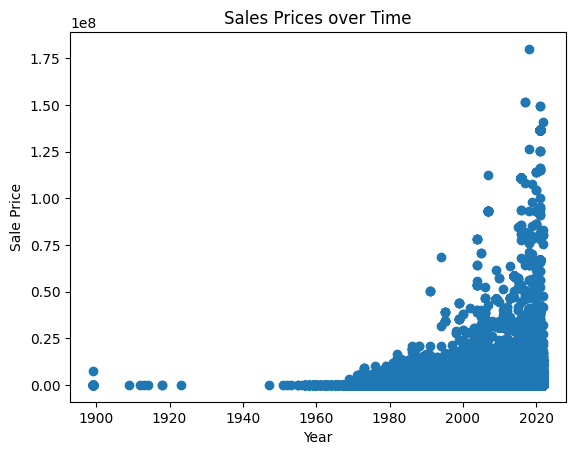

In [18]:
plt.scatter(df['year'],df['sale_price'])
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.title('Sales Prices over Time')
plt.show()

Going to adjust that to show only 1970 to the present.

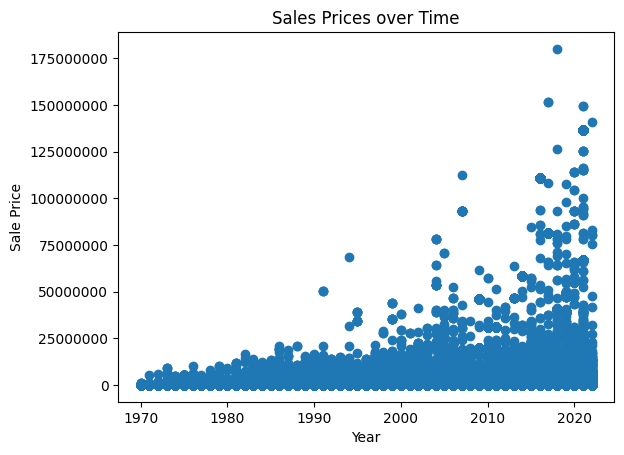

In [19]:
df70_22 = df[df['year']>=1970]
plt.scatter(df70_22['year'],df70_22['sale_price'])
plt.xlabel('Year')
plt.ticklabel_format(axis='y',style='plain')
plt.ylabel('Sale Price')
plt.title('Sales Prices over Time')
plt.show()

# New Section
I want to check out why there are so few non-null values for building_area_sqft, land_area_sqft, and land_assessed_value.


In [22]:
df[['building_area_sqft','land_area_sqft','land_assessed_value']].describe()

,building_area_sqft,land_area_sqft,land_assessed_value
count,73152.000000,4.597000e+04,7.603400e+04
mean,2009.059575,1.280258e+04,1.550146e+05
std,8819.176282,6.168497e+04,4.228881e+05
min,75.000000,3.140000e+02,0.000000e+00
25%,1050.000000,6.251000e+03,0.000000e+00
50%,1358.000000,7.627000e+03,1.080205e+05
75%,1861.000000,1.005400e+04,1.773580e+05
max,770724.000000,8.295937e+06,3.480112e+07


In [24]:
df.groupby('year')['building_area_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1899,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Okay, so we only have building_area_sqft for the years 2021 and 2022. The total number of data points is 73152, just like the number of non-null values listed at the beginning.

As a reminder, there are about 500,000 property ids, so only 14% of the property ids have information on building_area_sqft.

Something to notice is the extremely high maximum building_area_sqft. These sites need some checking on as well as the low-end values.

In [31]:
df[df['year']>2020].groupby('property_id')['building_area_sqft'].describe().sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
property_id,,,,,,,,
15 30 23 16650 000 0120,2.0,1379.0,0.0,1379.0,1379.0,1379.0,1379.0,1379.0
16 31 28 21276 002 0130,2.0,789.0,0.0,789.0,789.0,789.0,789.0,789.0
15 29 26 15120 000 0090,2.0,1611.0,0.0,1611.0,1611.0,1611.0,1611.0,1611.0
16 31 28 22338 002 0160,2.0,904.0,0.0,904.0,904.0,904.0,904.0,904.0
16 31 28 22338 002 0080,2.0,833.0,0.0,833.0,833.0,833.0,833.0,833.0
...,...,...,...,...,...,...,...,...
15 30 34 00000 330 0410,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 30 33 64782 000 0580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 30 33 73550 000 0010,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
yearly_salesdf.loc['2021':'2022']

,Number of Sales
year,
2021,93419
2022,20522


So in 2021 and 2022, there were 93,419 and 20522 sales in total. Since we had only building_area_sqft data for 2021 and 2022 sales, I selected only those years from the data frame, grouped the data by property_id and had pandas .describe() the ['building_area_sqft'] data.

There were 113,000ish sales in 2021 and 2022, but only 102,000ish property_ids listed in those sales, suggesting that some propertys were sold twice or more in the two years. It seems that building_area_sqft doesn't change.



---

I think if I ran the same examinations for land_area_sqft and land_assessed_value, I would get similar facts.



In [25]:
df.groupby('year')['land_area_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1899,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.groupby('year')['land_assessed_value'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1899,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595686 entries, 0 to 1595685
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   state                    1595686 non-null  object        
 1   property_zip5            1002398 non-null  float64       
 2   property_street_address  1595686 non-null  object        
 3   property_city            1595686 non-null  object        
 4   property_county          1595686 non-null  object        
 5   property_id              1595686 non-null  object        
 6   sale_datetime            1595686 non-null  object        
 7   property_type            1 non-null        object        
 8   sale_price               1595686 non-null  int64         
 9   seller_1_name            1045447 non-null  object        
 10  buyer_1_name             1047565 non-null  object        
 11  source_url               1595686 non-null  object        
 12  

building_area_sqft, land_area_sqft, and land_assessed_value all only have data for 2021 and 2022.

So far the most informational columns I seem to have are sale_datetime and the columns derived from it, the property_id as a unique identifier, and the sale_price.

This dataset was from a [dolthub database, narrowed down to just Pinellas County, Florida](https://www.dolthub.com/repositories/dolthub/us-housing-prices-v2/doc/main). I don't think there is much usable data here currently. Was really hoping that it would have numbers of beds and bathrooms data along with more building_area_sqft data.

Will run a quick correlation just to check out.

In [36]:
df[['sale_price','building_area_sqft','land_area_sqft','land_assessed_value','year']].corr()

,sale_price,building_area_sqft,land_area_sqft,land_assessed_value,year
sale_price,1.000000,0.091748,0.317017,0.044131,0.094722
building_area_sqft,0.091748,1.000000,0.473632,0.613039,-0.006081
land_area_sqft,0.317017,0.473632,1.000000,0.408477,-0.010311
land_assessed_value,0.044131,0.613039,0.408477,1.000000,-0.006994
year,0.094722,-0.006081,-0.010311,-0.006994,1.000000


Also want to run the correlation for the data only from 1970 onward.

In [37]:
df70_22[['sale_price','building_area_sqft','land_area_sqft','land_assessed_value','year']].corr()

,sale_price,building_area_sqft,land_area_sqft,land_assessed_value,year
sale_price,1.000000,0.091748,0.317017,0.044131,0.094793
building_area_sqft,0.091748,1.000000,0.473632,0.613039,-0.006081
land_area_sqft,0.317017,0.473632,1.000000,0.408477,-0.010311
land_assessed_value,0.044131,0.613039,0.408477,1.000000,-0.006994
year,0.094793,-0.006081,-0.010311,-0.006994,1.000000


Not much change here since the correlation only works with non-null values. The only difference is the years correlation with sale_price at 5 decimal places.